In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
Liqs_import=pt.import_excel('Viscoity_Giordano.xlsx', sheet_name='Sheet1', suffix="_Liq")
Liqs=Liqs_import['Liqs']
Liqs_input=Liqs_import['my_input']

## First test is from Giordano spreadsheet, right answer is 2.17 PaS (log n)
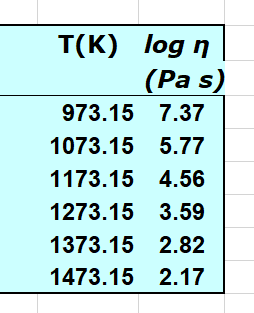

In [3]:
pt.calculate_viscosity_giordano_2008(liq_comps=Liqs, T=1200+273.15, F2O_content=Liqs_input['F2O'])

,n_melt,logn_melt,T_K,A,B,C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,149.018337,2.17324,1473.15,-4.55,7709.557501,326.447245,62.4,0.55,20.01,0.03,0.02,3.22,9.08,3.52,0.93,0.0,0.12,2,0.0,0.0,0.0,0.0,0


In [4]:
Liqs_import2=pt.import_excel('Viscoity_Giordano.xlsx', sheet_name='MELTSTest', suffix="_Liq")
Liqs2=Liqs_import2['Liqs']
Liqs_input2=Liqs_import2['my_input']


In [5]:
Melts_Vis_HT=pt.calculate_viscosity_giordano_2008(liq_comps=Liqs2, T=Liqs_input2['Temp HT1987_K'])

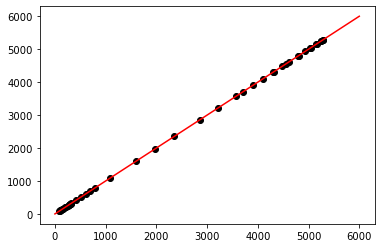

In [6]:
plt.plot(Melts_Vis_HT['n_melt'], Liqs_input2['Viscosity_PaS'], 'ok')
plt.plot([0, 6000], [0, 6000], '-r')

Text(0, 0.5, 'Python Viscosity - Matlab Viscosity')

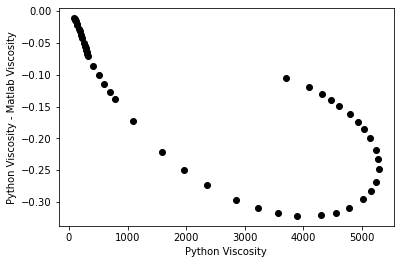

In [7]:
# Discrepency is less than 1 PaS. Likel rounding error on mola masses/coeffiients. 
plt.plot(Melts_Vis_HT['n_melt'], Melts_Vis_HT['n_melt']-Liqs_input2['Viscosity_PaS'], 'ok')
plt.xlabel('Python Viscosity')
plt.ylabel('Python Viscosity - Matlab Viscosity')

## Unit test example

In [8]:
LiqT=pd.DataFrame(data={"SiO2_Liq": 51,
                            "TiO2_Liq": 0.48,
                            "Al2O3_Liq": 19,
                            "FeOt_Liq": 5.3,
                            "MnO_Liq": 0.1,
                            "MgO_Liq": 4.5,
                            "CaO_Liq": 9,
                            "Na2O_Liq": 4.2,
                            "K2O_Liq": 0.1,
                            "Cr2O3_Liq": 0.11,
                            "P2O5_Liq": 0.11,
                            "H2O_Liq": 5,
                            "Fe3Fet_Liq":0.1,
}, index=[0])


In [12]:
pt.calculate_viscosity_giordano_2008(liq_comps=LiqT, T=1400).get("B")[0]

5808.444490771682

In [9]:
Melts_Vis_HT=pt.calculate_viscosity_giordano_2008(liq_comps=LiqT, T=1400)
Melts_Vis_HT

,n_melt,logn_melt,T_K,A,B,C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq
0,9.19193,0.963407,1400,-4.55,5808.444491,346.48721,51,0.48,19,5.3,0.1,4.5,9,4.2,0.1,0.11,0.11,5,0.1


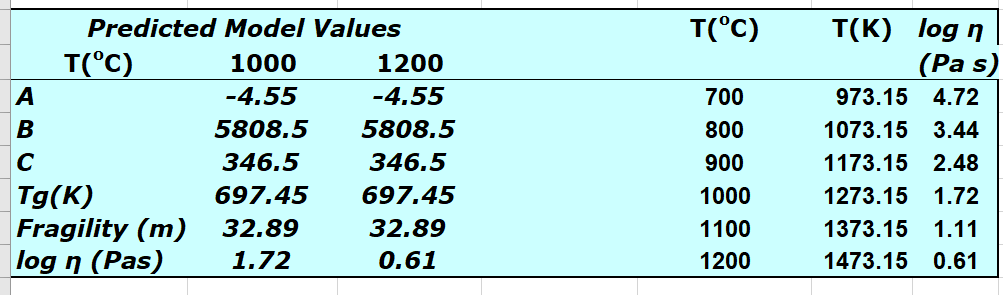